In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df=pd.read_csv('gdrive/My Drive/BostonHousing.csv')

Mounted at /content/gdrive


In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [2]:
from sklearn.model_selection import train_test_split
x = df.loc[:,df.columns!='medv']
y = df.loc[:,df.columns=='medv']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train =mms.fit_transform(x_train)
x_test =mms.transform(x_test)


In [3]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))
model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.05,verbose=1)


Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 569.4579 - mae: 22.0918 - val_loss: 533.6511 - val_mae: 21.1556
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 536.2469 - mae: 21.2995 - val_loss: 495.4091 - val_mae: 20.1760
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 486.8013 - mae: 20.0308 - val_loss: 431.7824 - val_mae: 18.3935
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 403.0523 - mae: 17.7389 - val_loss: 334.7401 - val_mae: 15.2088
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 289.4781 - mae: 14.1637 - val_loss: 224.4353 - val_mae: 10.8607
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 176.6451 - mae: 10.3682 - val_loss: 157.3685 - val_mae: 10.2888
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 125.4392 - mae: 8.5999 - val_loss: 148.4680 - val_mae: 10.1097
Epoch 8/100
11/11 [======================

In [5]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

5/5 [==============================] - 0s 4ms/step - loss: 9.8227 - mae: 2.4131
MSE :  9.822675704956055
MAE :  2.4131057262420654


In [6]:
y1 = model.predict(x_test[:])
y_test

5/5 [==============================] - 0s 3ms/step


,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


In [ ]:
ps=[]
for i in y1:
  ps.append(list(i)[0])
d = pd.DataFrame({'actual':y_test['medv'],'predicted':ps})
d

,actual,predicted
307,28.2,30.760668
343,23.9,27.055792
47,16.6,17.439062
67,22.0,20.840025
362,20.8,20.198009
...,...,...
467,19.1,15.710727
95,28.4,27.141823
122,20.5,19.342495
260,33.8,33.855076


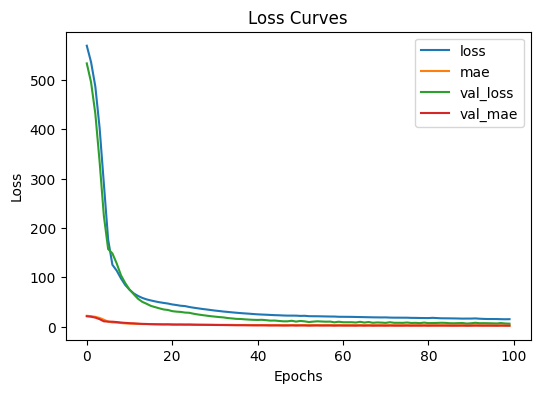

In [8]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()
